In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (6,4)
plt.rcParams['figure.dpi'] = 70

In [112]:
df = pd.read_excel("toplu-tama-bilet-fiyatlar-2017-2022.xlsx")[:-6]
df

,Yıl,Bilet Adı,Fiyatı (₺)
0,2017,Tam,2.60
1,2017,Öğrenci,1.25
2,2017,Sosyal,1.85
3,2018,Tam,2.60
4,2018,Öğrenci,1.25
5,2018,Sosyal,1.85
6,2019,Tam,3.50
7,2019,Öğrenci,1.70
8,2019,Sosyal,2.50
9,2020,Tam,3.50


# Ön Bilgi

**Yıl**:	 sütününda 2017 ve 2022 yılları bulunmaktadır

**Bilet Adı**: sütününde Öğrenci, Tam, Sosyal ve Öğrenci kartı bilgileri

**Fiyatı (₺)**: sütununda yıllara ve bilet bilet adına göre değişen bilgiler bulunmaktadır

# Genel Bilgiler

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Yıl         18 non-null     int64  
 1   Bilet Adı   18 non-null     object 
 2   Fiyatı (₺)  18 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 560.0+ bytes


In [81]:
df.shape

(18, 3)

In [82]:
df.isnull().sum()

Yıl           0
Bilet Adı     0
Fiyatı (₺)    0
dtype: int64

# Düzenlemeler

**Yıl**, **Bilet Adı**, **Fiyatı (₺)** sütünlarını

**yil**, **bilet_adi**, **fiyati** ile değiştirelim

In [113]:
df.columns = ["yil", "bilet_adi", "fiyati"]

In [7]:
df.columns

Index(['yil', 'bilet_adi', 'fiyati'], dtype='object')

In [84]:
df.yil.unique()

array([2017, 2018, 2019, 2020, 2021, 2022], dtype=int64)

In [85]:
df.bilet_adi.unique()

array(['Tam', 'Öğrenci', 'Sosyal'], dtype=object)

**Bakacak olursak Öğrenci ve Öğrenci Kartı aslında aynı anlama geliyor daha düzenli olması açısından Öğrenci Kartı değerini öğrenci ile değiştirelim**

In [114]:
df.replace("Öğrenci Kartı", "Öğrenci", inplace = True)

In [87]:
df.bilet_adi.unique()

array(['Tam', 'Öğrenci', 'Sosyal'], dtype=object)

# Bilet Fiyatlarının Değişimi

**bilet adı'nı baz alarak yıllara göre fıyat degısıklıgını gozlemleyelım**

In [88]:
df.groupby(["yil", "bilet_adi"]).fiyati.sum()

yil   bilet_adi
2017  Sosyal       1.85
      Tam          2.60
      Öğrenci      1.25
2018  Sosyal       1.85
      Tam          2.60
      Öğrenci      1.25
2019  Sosyal       2.50
      Tam          3.50
      Öğrenci      1.70
2020  Sosyal       2.50
      Tam          3.50
      Öğrenci      1.70
2021  Sosyal       2.50
      Tam          3.50
      Öğrenci      1.70
2022  Sosyal       5.49
      Tam          7.67
      Öğrenci      3.74
Name: fiyati, dtype: float64

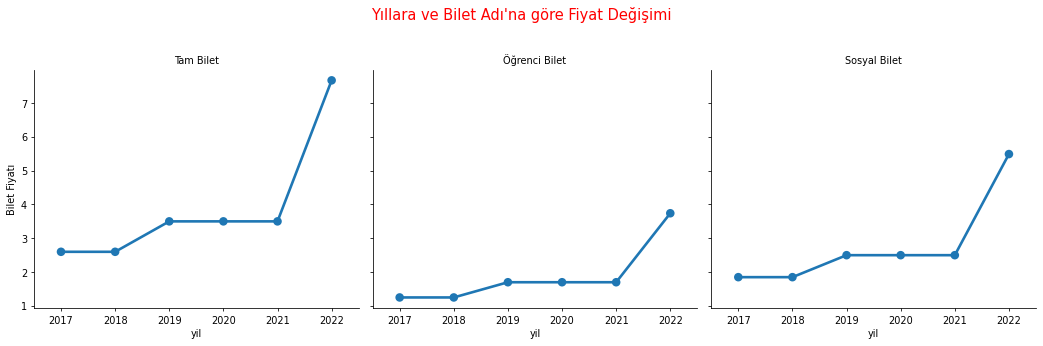

In [89]:
g = sns.catplot(kind = "point",
            col = "bilet_adi",
            data = df,
            x = "yil",
            y = "fiyati")
g.set_titles(col_template = "{col_name} Bilet")
g.set_ylabels("Bilet Fiyatı")
g.fig.suptitle("Yıllara ve Bilet Adı'na göre Fiyat Değişimi", fontsize = 15, color = "red")
g.fig.subplots_adjust(top = 0.8);

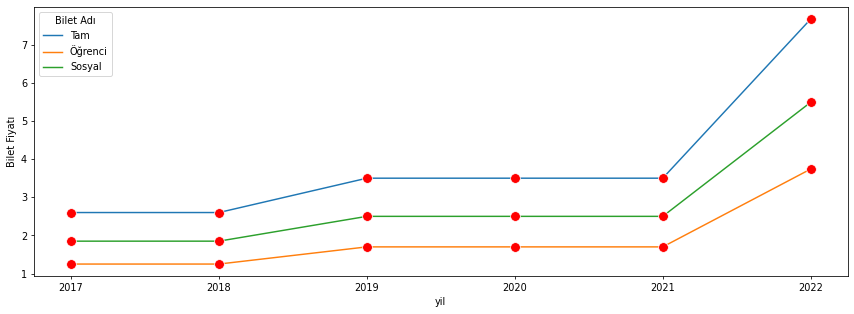

In [214]:
plt.figure(figsize = (15,5))
sns.lineplot(x = df.yil, y = df.fiyati, 
             hue = df.bilet_adi, 
             marker = "o", markerfacecolor = "r", markersize = 10)
plt.legend(title = ("Bilet Adı"))
plt.ylabel("Bilet Fiyatı");

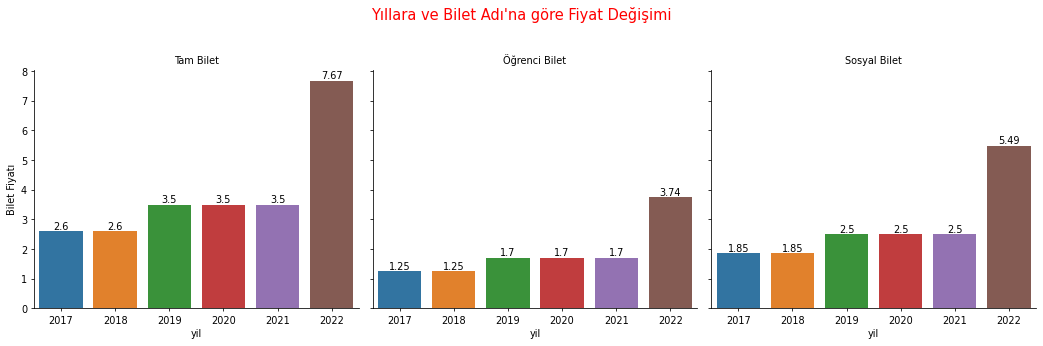

In [190]:
g = sns.catplot(kind = "bar", 
                col = "bilet_adi",
                data = df, 
                x = "yil", 
                y = "fiyati")
g.set_titles(col_template = "{col_name} Bilet")
g.set_ylabels("Bilet Fiyatı")
g.fig.suptitle("Yıllara ve Bilet Adı'na göre Fiyat Değişimi", fontsize = 15, color = "red")
g.fig.subplots_adjust(top = 0.8)

for ax in g.axes.ravel() :
    for i in ax.containers :
        ax.bar_label(i);

**Görülebileceği üzere 2021 yılı fiyatları ile 2022 yılı fiyatlarının arasında ciddi bir artış var. Şimdi de yıllara ve bilet adına göre zam oranlarına bakalım**

In [167]:
df = df.join((pd.DataFrame(((df[3:].append(df[-3:]).reset_index()).fiyati / df.fiyati -1) * 100).set_index(np.arange(3,21))).rename(columns = {"fiyati" : "artıs_oranı"}))
df

,yil,bilet_adi,fiyati,artıs_oranı
0,2017,Tam,2.60,NaN
1,2017,Öğrenci,1.25,NaN
2,2017,Sosyal,1.85,NaN
3,2018,Tam,2.60,0.000000
4,2018,Öğrenci,1.25,0.000000
5,2018,Sosyal,1.85,0.000000
6,2019,Tam,3.50,34.615385
7,2019,Öğrenci,1.70,36.000000
8,2019,Sosyal,2.50,35.135135
9,2020,Tam,3.50,0.000000


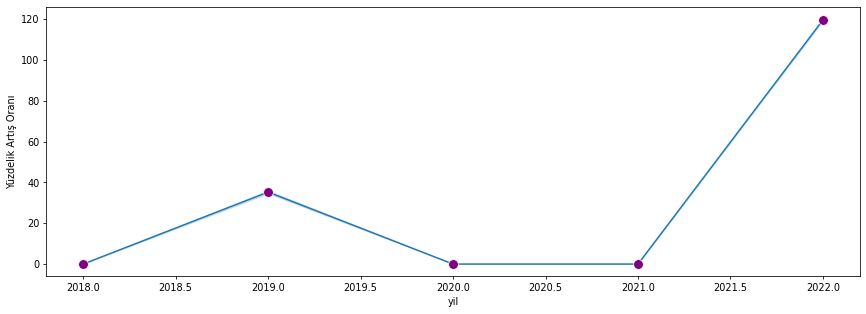

In [227]:
plt.figure(figsize = (15,5))
g = sns.lineplot(x = df.yil, y = df.artıs_oranı,
                 marker = "o", markerfacecolor = "purple", markersize = 10)
plt.ylabel("Yüzdelik Artış Oranı");

**Görüldüğü üzere 2022 yılında bi önceki yıla zam oranı %120 seviyelerinde gezmiş**